# Linear Regression
데이터 포인트 $\mathbf{x}$를 통해 *real valued target* $y$를 예측하는 것

### Linear Model
면적과 연식에 기반해 집값을 추정한다고 해보자
선형성(linearity)의 추정은 모델이 다음과 같이 표현될 수 있다는 것을 시사한다
$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b$$
$$혹은$$
$$\hat{y} = w_1 \cdot x_1 + ... + w_d \cdot x_d + b$$
$$혹은$$
$$\hat{y} = \mathbf{w}^T \mathbf{x} + b$$

### Training Data
가장 먼저 필요한 것은 training data이다. 우리의 목표는 error를 최소화하는 model parameter를 식별하는 것이다. Data set은 'training data' 혹은 'training set'으로 불린다. 우리의 예제에서는 집(집과 가격)이 하나의 'sample'이고, 실제 집값이 'label'으로 불린다.  
  
  
보통 dataset의 sample 개수를 나타내기 위해 $n$을 사용한다.
sample의 index 표기를 위해 $i$를 사용하는데, 각 input data point는 $x^{(i)} = [x_1^{(i)}, x_2^{(i)}]$, label은 $y^{(i)}$로 나타난다.

### Loss Function

Model training에서 우리는 예측값과 실제값과의 차이(error)를 측정해야 한다.
보통 음수가 아닌 수를 error로 선택하고, 이 value가 작을수록 error가 작다.
흔한 선택은 square function이다.
주어진 parameter $\mathbf{w}$와 $b$에 대해서,
주어진 sample에 대한 예측의 error를 다음과 같이 나타낼 수 있다.
상수 $1/2$는 수학적 편의를 위해 도입되었다.
Error가 작을 수록 예측값은 실제값과 가깝고, 두 값이 같다면 error는 0이다.
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,$$

이러한 사안들을 명확하기 위하여 1차원의 regression 문제를 생각해보자.  
(집값이 면적에만 영향을 받는다고 가정)

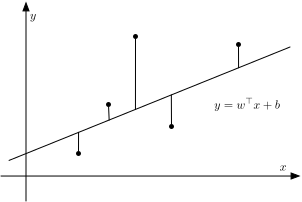

In [1]:
from IPython.display import SVG
SVG(filename='../img/linearregression.svg')

선형 회귀(Linear regression)은  단층(single-layer) 신경망이다.

추정값(y-hat)과 관찰값(y) 사이의 간극은 loss 측면에서 상당한 기여를 한다.(제곱이 되므로)  
전체 dataset에 대한 model의 quality를 측정하기 위해, loss를 평균낼 수 있다.

model을 학습할 때, 우리는 모든 학습 sample에 걸쳐 평균 loss를 최소화하는 parameter($\mathbf{w}^*, b^*$)를 찾기를 원한다.
$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$
  
선형 회귀는 간단한 최적화 문제를 위해 사용된다.

### Gradient descent
거의 모든 딥러닝 문제 뒤에 숨은 핵심 트릭은 반복적으로 parameter를 업데이트하며 error를 점진적으로 감소시키는 것이다. 점점 loss function 값을 줄이는 방향으로 parameter를 이동시키는 알고리즘, 이 알고리즘을 gradient descent라고 부른다.  
Convex loss surface에서는 global minimum으로 수렴되고, nonconvex surface의 경우에는 local minimum(바라건대 좋은)으로 향하게 된다.

### Model Prediction
Training process를 완수한 후에, 우리는 $\hat{\mathbf{w}}, \hat{b}$으로 표기되는 추정 parameter를 기록한다("hat" 표시는 추정값을 나타낸다.).
Deep neural networks에서 *training data*에 대한 loss를 최소화하는 parameter들을 찾는 것은 그닥 중요한 문제는 아니다. 더 어마어마한 일은 "unseen" data들에 대해 적은 loss를 얻을 수 있는 parameter를 찾는 것이다. 이러한 도전은 *generalization*이라 불린다.

## From Linear Regression to Deep Networks
우리는 선형 함수에 대해 이야기를 해 보았는데, 신경망은 훨씬 다양한 모델 군집을 다룬다. 우리는 선형 모델을 신경망의 언어로 표현함으로써 하나의 신경망으로 생각할 수 있다.(번역이 쉽지 않음) 이것들을 'layer(계층)' notation으로 재작성하며 시작해보자.

### Neural Network Diagram
아래의 망에서, input은 $x_1, x_2, \ldots , x_d$이다.  
input의 개수는 "feature dimension"으로 불리기도 한다.  


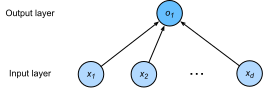

In [2]:
from IPython.display import SVG
SVG(filename='../img/singleneuron.svg')

### Vectorization for Speed
모델 학습과 예측을 할 때, 동시에 벡터 계산과 여러 observation을 처리하는 일은 빈번히 일어난다. 이게 왜 중요한지 묘사하기 위해서, 벡터를 합하는 두 가지 방법을 생각해보자.  
10000차원의 벡터 두 개를 만드는 것으로 시작해보겠다.

In [3]:
import torch
from time import time

a = torch.ones(10000)
b = torch.ones(10000)

한 가지 방법은 for loop을 사용해 계산하는 것이다.

In [7]:
start = time()
c = torch.zeros(10000)
for i in range(10000):
    c[i] = a[i] + b[i]
time() - start

0.10625600814819336

다른 방법은 직접 vector를 합하는 것이다.

In [8]:
start = time()
d = a + b
time() - start

0.0

후자의 경우가 훨씬 빠르고, 잠재적인 에러 발생을 줄여준다.
따라서 코드를 vectorizing하는 것이 좋다.

## The Normal Distribution and Squared Loss
Squared loss $l(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2$는 많은 좋은 특성을 갖는다.  
도함수가 $\partial_{\hat{y}} l(y, \hat{y}) = (\hat{y} - y)$로 간단하다. 즉, 경사가 estimate과 observation의 차다.  
선형 함수는 통계적 모델인데, 평균$\mu$와 분산$\sigma^2$의 정규분포를 생각해보자.
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right)$$

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline
import torch
import math

x = torch.arange(-7, 7, 0.01)
# 평균과 분산 쌍
parameters = [(0, 1), (0, 2), (3, 1)]

# JPG보단 SVG죠
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))
for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * torch.exp(-(0.5/sigma**2) * (x - mu) ** 2)
    plt.plot(x.numpy(), p.numpy(), label='mean ' + str(mu) + ', variance' + str(sigma))
    
plt.legend()
plt.show()

This code is not working :(

## Summary
* 기계학습 모델의 중요한 요소는 training data, loss function, optimization algorithm, 그리고 model 그 자체
* Vectorizing은 수학적 측면에서 모든 것을 개선하고, 코드 측면에서 모든 것을 빠르게 해준다.
* objective function을 최소화하고 maximum likelihood를 수행하는 것은 같은 것을 뜻할 수 있다.
* 선형 모델또한 신경망이다.